# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from api_keys import geoapify_key
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city =citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 561


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kristiansund
Processing Record 2 of Set 1 | praia da vitoria
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | prince george
Processing Record 6 of Set 1 | wyndmoor
Processing Record 7 of Set 1 | lerwick
Processing Record 8 of Set 1 | i-n-salah
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | palikir - national government center
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | coruripe
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | riyadh
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | neka
Processing Record 19 of Set 1 | labasa
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | novoagansk
Processing Record 22 of Set 1 | faya-l

Processing Record 40 of Set 4 | imbituba
Processing Record 41 of Set 4 | thai binh
Processing Record 42 of Set 4 | mora
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | byron bay
Processing Record 46 of Set 4 | grand-lahou
Processing Record 47 of Set 4 | uglegorsk
Processing Record 48 of Set 4 | baiti
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | thetford-mines
Processing Record 1 of Set 5 | isafjordur
Processing Record 2 of Set 5 | takamaka
City not found. Skipping...
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | terrace
Processing Record 5 of Set 5 | jiuquan
Processing Record 6 of Set 5 | bukoba
Processing Record 7 of Set 5 | macouria
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | chibougamau
Processing Record 10 of Set 5 | didymoteicho
Processing Record 11 of Set 5 | chinde
Processing Record 12 of Set 5 | east l

Processing Record 29 of Set 8 | gmunden
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | road town
Processing Record 36 of Set 8 | insar
Processing Record 37 of Set 8 | zaozersk
Processing Record 38 of Set 8 | linares
Processing Record 39 of Set 8 | al kharijah
Processing Record 40 of Set 8 | ola
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | sol'tsy
Processing Record 43 of Set 8 | buka
Processing Record 44 of Set 8 | yamada
Processing Record 45 of Set 8 | santa elena de uairen
Processing Record 46 of Set 8 | sechelt
Processing Record 47 of Set 8 | acapulco de juarez
Processing Record 48 of Set 8 | badger
Processing Record 49 of Set 8 | cherryville
Processing Record 0 of Set 9 | aripuana
Processing Record 1 of Set 9 | caleta de carquin
Processing 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,77,43,2.24,NZ,1698634030
1,taroa,8.7058,171.2275,28.32,80,100,8.96,MH,1698634031
2,puerto natales,-51.7236,-72.4875,1.87,89,94,1.32,CL,1698633972
3,port elizabeth,-33.9180,25.5701,13.16,76,40,4.63,ZA,1698634031
4,hawaiian paradise park,19.5933,-154.9731,27.63,78,100,2.57,US,1698634031


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'output_data'

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

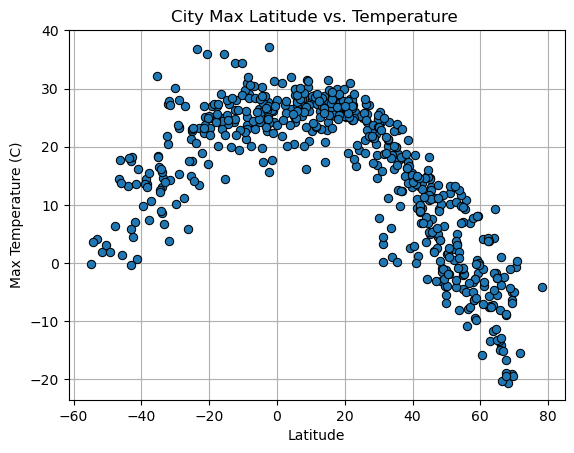

In [18]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

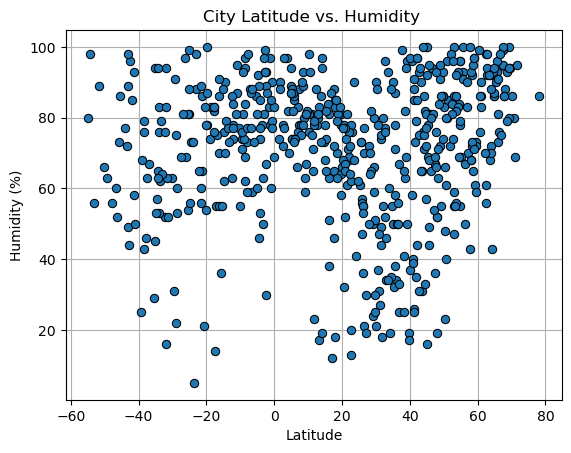

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

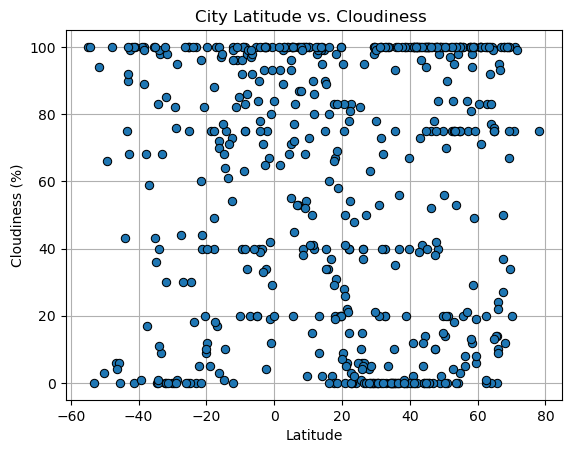

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

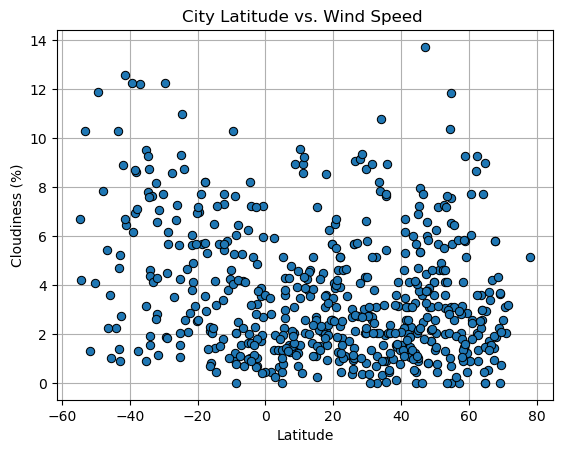

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Wind Speed ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,taroa,8.7058,171.2275,28.32,80,100,8.96,MH,1698634031
4,hawaiian paradise park,19.5933,-154.9731,27.63,78,100,2.57,US,1698634031
5,sitka,57.0531,-135.3300,6.94,70,75,0.00,US,1698634031
6,brookings,44.3114,-96.7984,-2.73,86,100,5.66,US,1698633849
7,mandalgovi,45.7625,106.2708,7.63,44,100,7.96,MN,1698634032


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,77,43,2.24,NZ,1698634030
2,puerto natales,-51.7236,-72.4875,1.87,89,94,1.32,CL,1698633972
3,port elizabeth,-33.9180,25.5701,13.16,76,40,4.63,ZA,1698634031
8,papatowai,-46.5619,169.4708,14.37,60,6,5.42,NZ,1698634032
9,ingeniero jacobacci,-41.3427,-69.5448,0.68,58,0,12.58,AR,1698634032


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7968309951624861


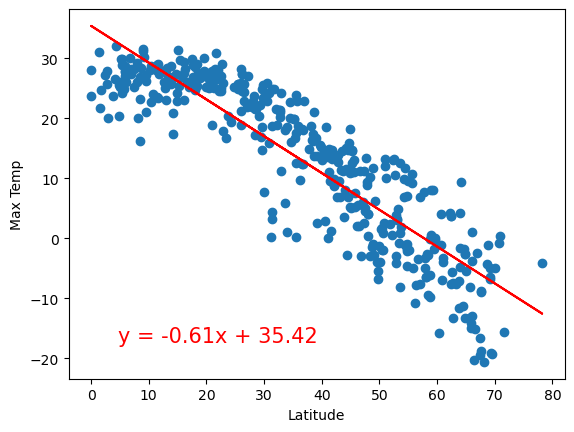

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.5303539563962003


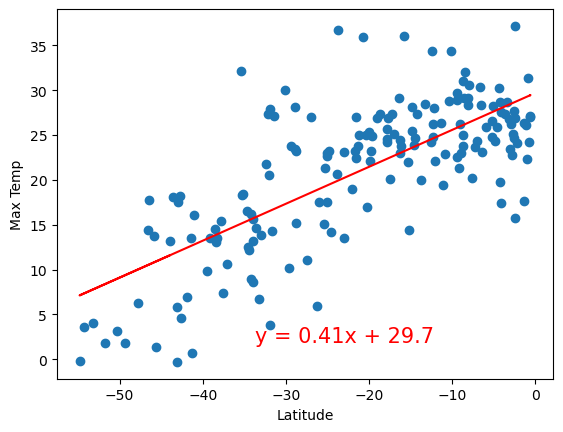

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

Discussion about the linear relationship: Northern Hemisphere, you can appreciate that the max temperature drops as the latitude increases, the r-value can be rounded up to 0.80. In the Southern Hemisphere the r-value can be rounded up to 0.53

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02231074059700481


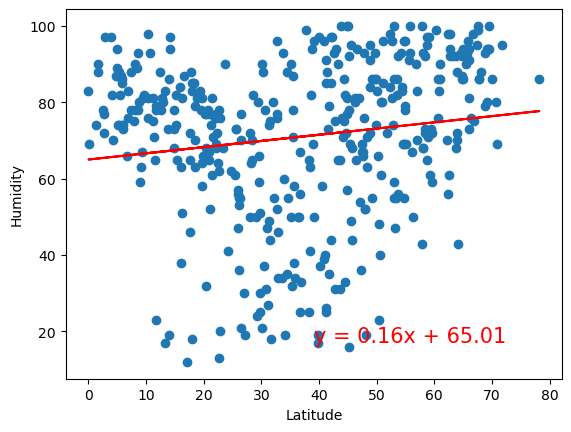

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.04698619341609805


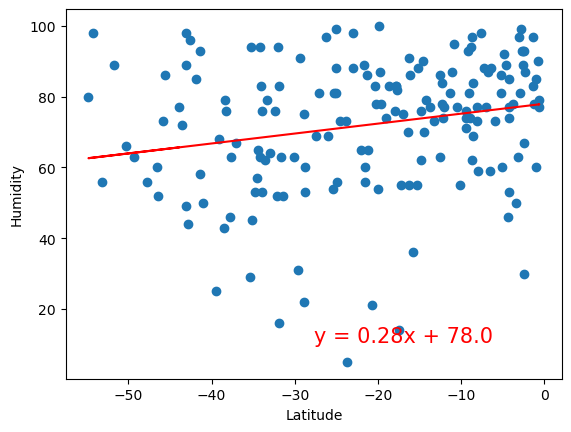

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and huminity 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0012312716073918084


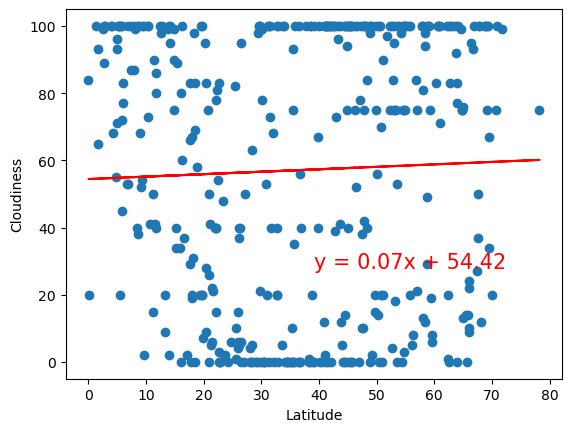

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.017083040275174776


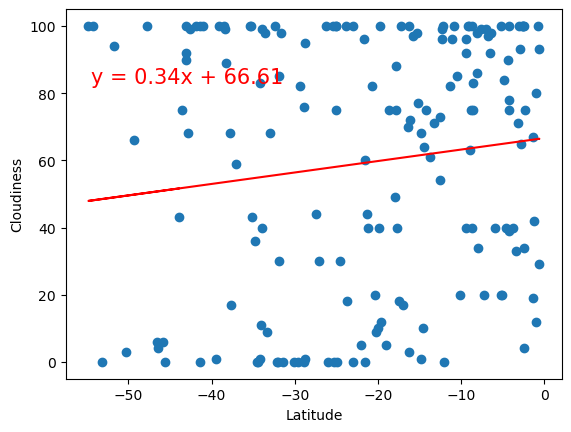

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and Cloudliness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0018310386620865222


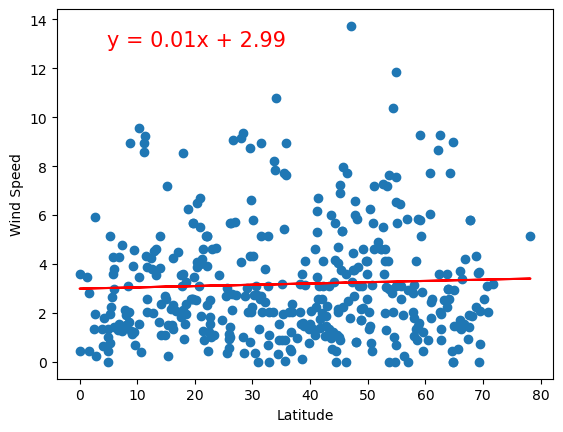

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.11897402667837224


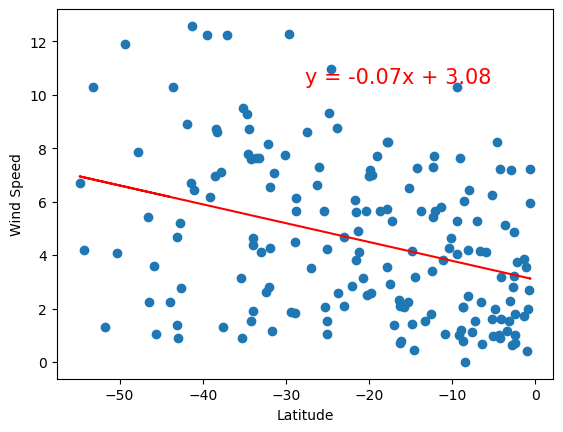

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and Wind Speed